<a href="https://colab.research.google.com/github/Harbhajan-Kaur/final_project_Harbhajan_Kaur/blob/main/Kaggle_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install kaggle #install kaggle library

In [5]:
from google.colab import drive
drive.mount('/content/drive')   #connect to google drive

Mounted at /content/drive


In [6]:
! mkdir ~/.kaggle #directory name kaggle

In [7]:
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/  #copy token to kaggle(dir)

cp: cannot stat '/content/drive/MyDrive/Kaggle_API/kaggle.json': No such file or directory


In [8]:
! chmod 600 ~/.kaggle/kaggle.json #only owner has read and write permission

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
! kaggle datasets download akashshingha850/mrl-eye-dataset


Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT
 99% 326M/329M [00:04<00:00, 53.7MB/s]
100% 329M/329M [00:04<00:00, 73.7MB/s]


In [10]:
! unzip mrl-eye-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/val/sleepy/s0013_02688_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02689_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02692_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02693_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02694_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02700_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02710_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02713_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02716_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02726_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02728_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02738_0_1_0_1_0_01.png  
  inflating: data/val/sleepy/s0013_02748_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02755_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02778_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02806_0_1_0_0_

In [11]:
# Define paths
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

In [12]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [13]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale pixels from 0to 1
    rotation_range=20, #rotate image to 20 degree
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    #agumentaion is only applied to training dataset whereas and rescaling is done in both traing and test dataset
)

val_datagen = ImageDataGenerator(rescale=1./255)     #same pixel size
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  #resize all the images in
    batch_size=32,  #loads images in batches of 32..memory efficency
    class_mode='binary'     #binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter #counts occurance

# Function to plot class distribution
def plot_class_distribution(generator, title): #generator-dataset
    labels = generator.classes                                                           #extract classes
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys()) #dictionary ki keys

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

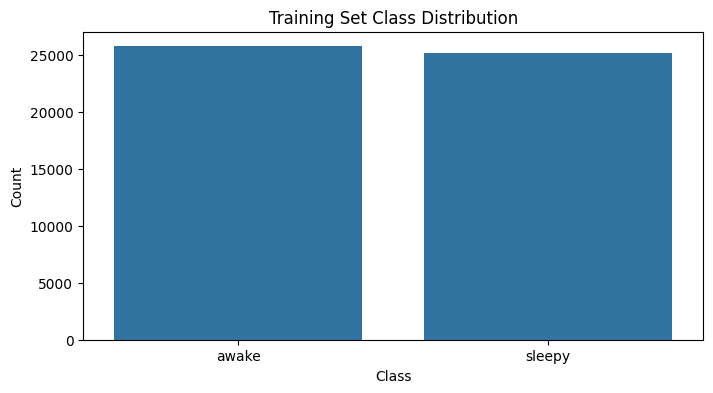

In [15]:
# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')

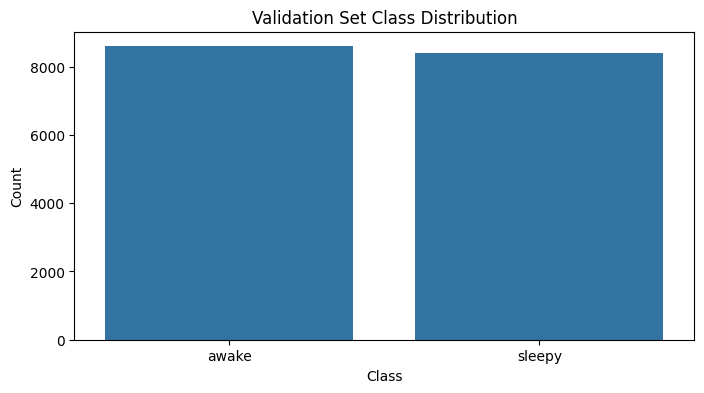

In [16]:
# Plot class distribution for val set
plot_class_distribution(val_generator, 'Validation Set Class Distribution')

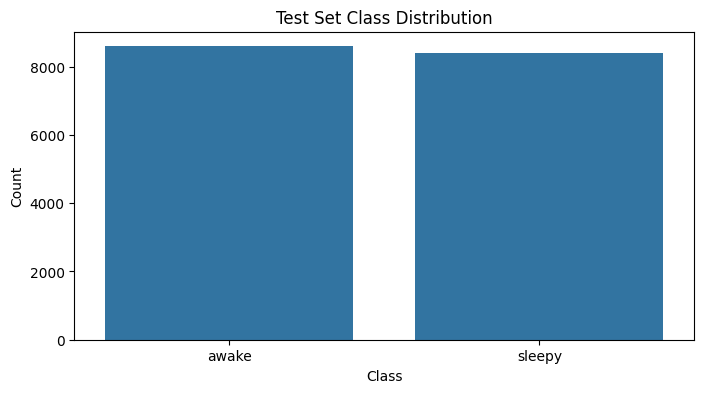

In [17]:
# Plot class distribution for test set
plot_class_distribution(test_generator, 'Test Set Class Distribution')

In [25]:
import cv2

In [28]:
img_array=cv2.imread("/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)


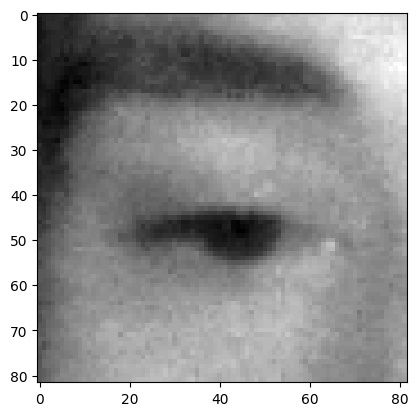

In [29]:
plt.imshow(img_array,cmap="gray")

In [30]:
img_array=cv2.imread("/content/data/train/sleepy/s0001_00002_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)


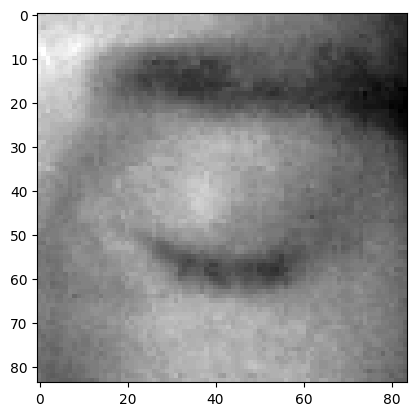

In [31]:
plt.imshow(img_array,cmap="gray")

In [32]:
# Function to plot sample images
def plot_sample_images(generator, title): #batch of images,title for image
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1) #images placement                     #images with class name
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

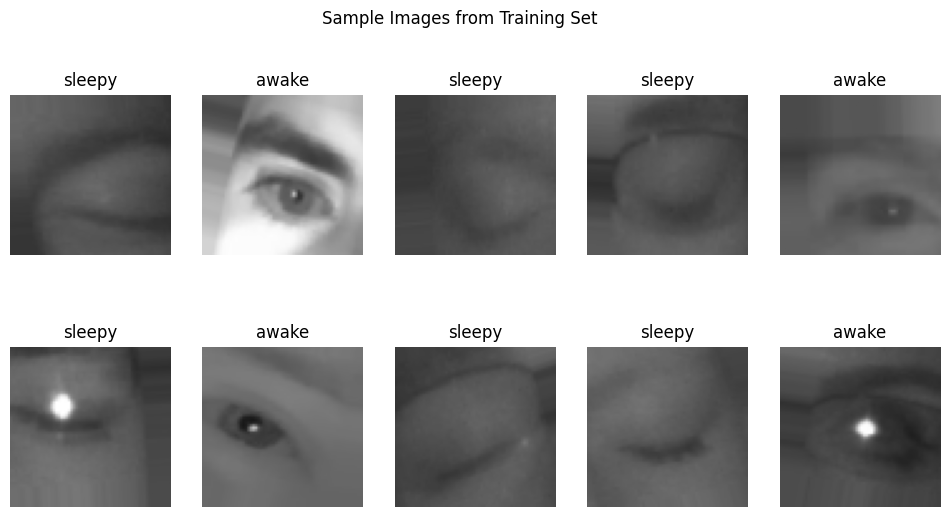

In [33]:
# Plot sample images from train set
plot_sample_images(train_generator, 'Sample Images from Training Set')

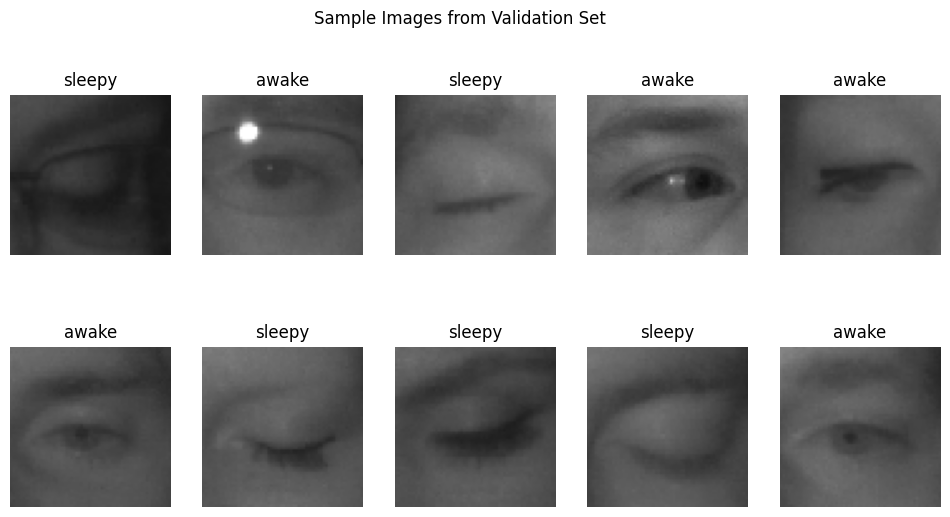

In [34]:
# Plot sample images from  val set
plot_sample_images(val_generator, 'Sample Images from Validation Set')

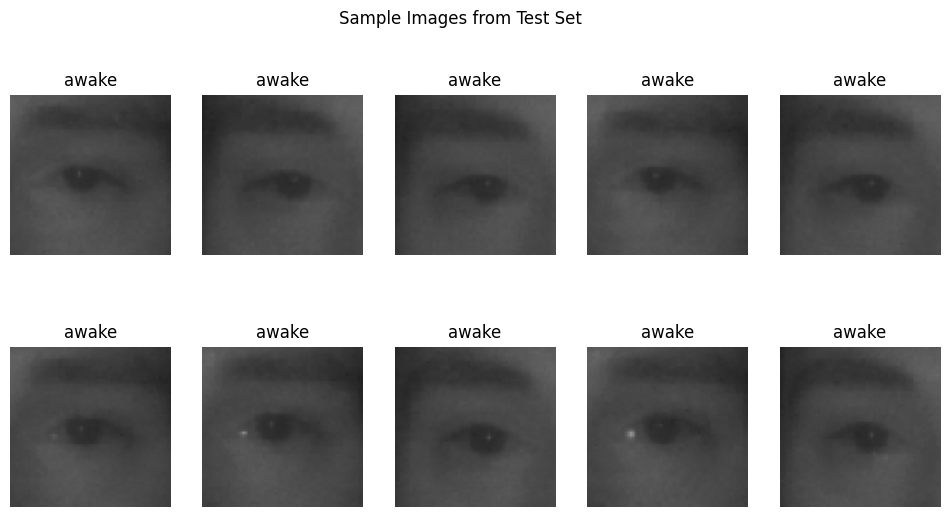

In [35]:
# Plot sample images from test set
plot_sample_images(test_generator, 'Sample Images from Test Set')

In [36]:
# Check image dimensions
print(f"Image shape: {train_generator.image_shape}")

Image shape: (64, 64, 3)


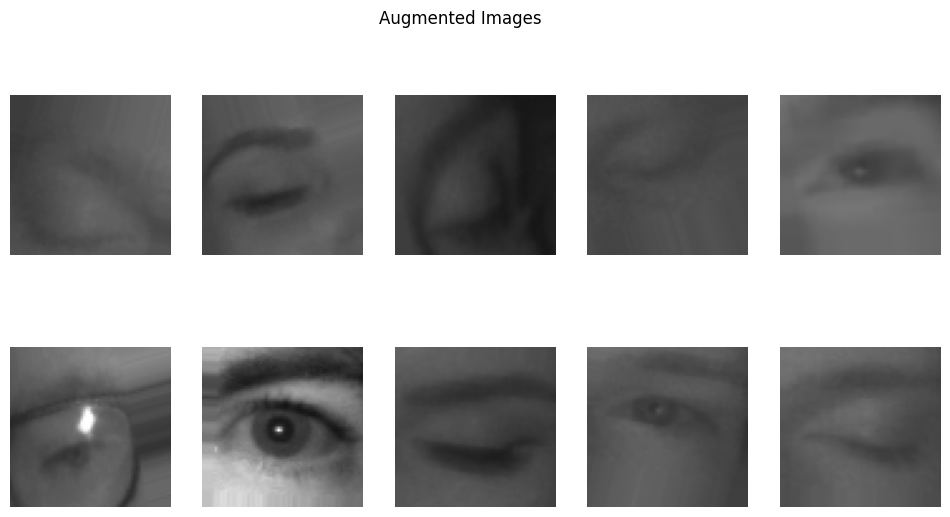

In [37]:
# Visualize data augmentation effects
augmented_images, _ = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()